In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0] 
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [79]:
'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom sklearn.neighbors import KNeighborsClassifier\n'

In [111]:
import matplotlib.pyplot as plt
import numpy as np

class KNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, a, b):
        a = np.array(a)
        b = np.array(b)
        if(a[:, 0].size < self.n_neighbors):
            raise Exception("train data array size smaller than n_neighbors! (n_neighbors="+str(self.n_neighbors)+")")
        if(a[:, 0].size != b.size):
            raise Exception("train input array size different with train target array size! (input array size : "+str(a.size)+" target array size : "+str(b.size)+")")
        self.input_data = a
        self.target_data = b
        
    def predict(self, data):
        distances_list = []
        for i in data:
            distances, indexes = self.kneighbors(i)
            prediction_score = self.target_data[indexes].sum()
            if(prediction_score > self.n_neighbors/2): 
                distances_list.append(1)
            else:
                distances_list.append(0)
        return np.array(distances_list)
        
    def kneighbors(self, data):
        distances_xy = self.input_data - data
        distances_arr = np.sqrt(np.power(distances_xy[:, 0], 2)+np.power(distances_xy[:, 1], 2))
        index_rank = distances_arr.argsort()
        np.flip(index_rank)
        index_arr = index_rank[:self.n_neighbors]
        return distances_arr[index_arr], index_arr
    
    def score(self, test_input, test_target):
        test_result = self.predict(test_input)
        score_arr = test_target==test_result
        score = np.ones_like(score_arr)[score_arr].sum() / score_arr.size
        return score

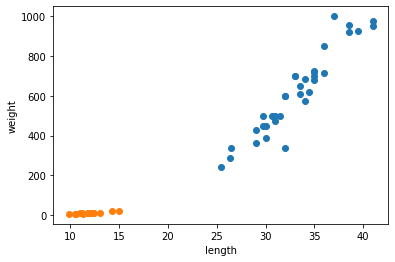

In [112]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [113]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [114]:
fish_data = [[l, w] for l, w in zip(length, weight)]

In [115]:
fish_target = [1]*35 + [0]*14

In [116]:
kn = KNeighborsClassifier()  #default value of k = 5

In [117]:
kn.fit(fish_data, fish_target)           #fit method : 기준 학습
print(kn.score(fish_data, fish_target))  #score method : 훈련이 잘 되었는지 평가 (정확도)

1.0


In [118]:
kn = KNeighborsClassifier(n_neighbors=49) #k = 49

In [119]:
kn.fit(fish_data, fish_target)           #fit method : 기준 학습
print(kn.score(fish_data, fish_target))  #score method : 훈련이 잘 되었는지 평가 
#1이 나오지 않는 것은 k=49일 때 어떤 데이터를 넣어도 도미가 나오기 때문

0.7142857142857143


실습!!! 
위 코드에서는 훈련시킬 때 사용한 데이터를 그대로 테스트했기 때문에 1이 나온 것.
즉, 훈련 데이터와 테스트 데이터가 똑같았다는 이야기.

훈련 데이터와 테스트 데이터를 달리하여 실습해 보자.
샘플이 골고루 섞이도록 numpy.random을 이용할 것이다.
* 샘플링 편향 : 샘플이 한쪽으로 치우친 경우

In [120]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [121]:
np.random.seed(42)
index = np.arange(49) # [0, 1, 2, ... , 48]
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [122]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

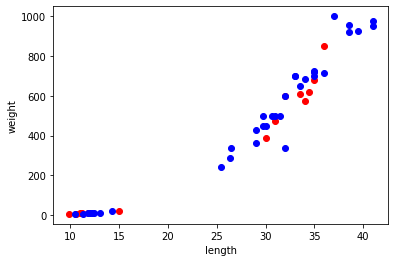

In [123]:
plt.scatter(test_input[:, 0], test_input[:, 1], c="red")
plt.scatter(train_input[:, 0], train_input[:, 1], c="blue")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [124]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

print(kn.predict(test_input))
print(test_target)

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [125]:
print(kn.predict([[25.0, 150.0]]))

[0]


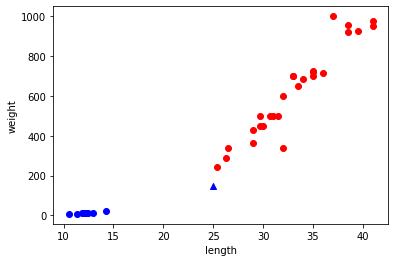

In [126]:
filter_arr = train_target==1
plt.scatter(train_input[filter_arr][:, 0], train_input[filter_arr][:, 1], c="red")
filter_arr = train_target==0
plt.scatter(train_input[filter_arr][:, 0], train_input[filter_arr][:, 1], c="blue")
plt.scatter(25.0, 150.0, c="blue", marker='^')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

1
4


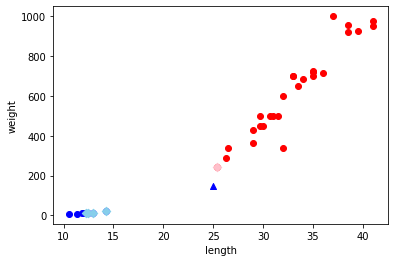

In [127]:
filter_arr = train_target==1
plt.scatter(train_input[filter_arr][:, 0], train_input[filter_arr][:, 1], c="red")
filter_arr = train_target==0
plt.scatter(train_input[filter_arr][:, 0], train_input[filter_arr][:, 1], c="blue")
plt.scatter(25.0, 150.0, c="blue", marker='^')

distances, indexes = kn.kneighbors([[25, 150]])

filter_arr = train_target==1
filter_arr = filter_arr[indexes]
print(train_input[indexes, 0][filter_arr].size)
plt.scatter(train_input[indexes, 0][filter_arr], train_input[indexes, 1][filter_arr], c="pink", marker='D')

filter_arr = train_target==0
filter_arr = filter_arr[indexes]
print(train_input[indexes, 0][filter_arr].size)
plt.scatter(train_input[indexes, 0][filter_arr], train_input[indexes, 1][filter_arr], c="skyblue", marker='D')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [128]:
print(distances)

[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]


1
4


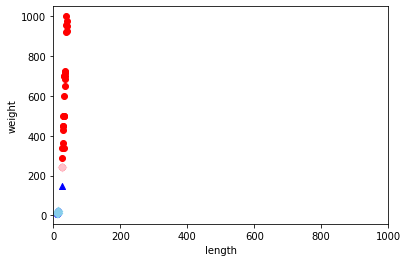

In [129]:
filter_arr = train_target==1
plt.scatter(train_input[filter_arr][:, 0], train_input[filter_arr][:, 1], c="red")
filter_arr = train_target==0
plt.scatter(train_input[filter_arr][:, 0], train_input[filter_arr][:, 1], c="blue")
plt.scatter(25.0, 150.0, c="blue", marker='^')

distances, indexes = kn.kneighbors([[25, 150]])

filter_arr = train_target==1
filter_arr = filter_arr[indexes]
print(train_input[indexes, 0][filter_arr].size)
plt.scatter(train_input[indexes, 0][filter_arr], train_input[indexes, 1][filter_arr], c="pink", marker='D')

filter_arr = train_target==0
filter_arr = filter_arr[indexes]
print(train_input[indexes, 0][filter_arr].size)
plt.scatter(train_input[indexes, 0][filter_arr], train_input[indexes, 1][filter_arr], c="skyblue", marker='D')

plt.xlim(0, 1000)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

z-점수 표준화! Xnew = (X-mean(X)) / StdDev(X)

In [130]:
mean = np.mean(train_input, axis = 0) # axis=0이면 열 따라, axis=1이면 행 따라
std = np.std(train_input, axis = 0)

train_scaled = (train_input-mean) / std # 브로드캐스팅 이용

In [131]:
kn.fit(train_scaled, train_target)

In [132]:
new = ([25, 150]-mean) / std
print(kn.predict([new]))
distances, indexes = kn.kneighbors([new])

[1]


5
0


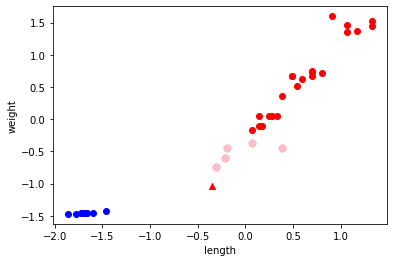

In [133]:
filter_arr = train_target==1
plt.scatter(train_scaled[filter_arr][:, 0], train_scaled[filter_arr][:, 1], c="red")
filter_arr = train_target==0
plt.scatter(train_scaled[filter_arr][:, 0], train_scaled[filter_arr][:, 1], c="blue")
plt.scatter(new[0], new[1], c="red", marker='^')

filter_arr = train_target==1
filter_arr = filter_arr[indexes]
print(train_scaled[indexes, 0][filter_arr].size)
plt.scatter(train_scaled[indexes, 0][filter_arr], train_scaled[indexes, 1][filter_arr], c="pink", marker='D')

filter_arr = train_target==0
filter_arr = filter_arr[indexes]
print(train_scaled[indexes, 0][filter_arr].size)
plt.scatter(train_scaled[indexes, 0][filter_arr], train_scaled[indexes, 1][filter_arr], c="skyblue", marker='D')

plt.xlabel("length")
plt.ylabel("weight")
plt.show()